# Numpy Tutorial

In [105]:
import numpy as np
print (np.__version__)
import matplotlib.pyplot as plt

1.15.4


# Section I:  ndarray
The most important object defined in NumPy is an N-dimensional array type called __ndarray__. It describes the collection of items of the same type. Items in the collection can be accessed using a zero-based index.

Every item in an ndarray takes the same size of block in the memory. Each element in ndarray is an object of data-type object (called dtype). Note that numpy.array is not the same as the Standard Python Library class array.array, which only handles one-dimensional arrays and offers less functionality. 

### 1. Create A Numpy Array

An instance of ndarray class can be constructed by different array creation routines described later in the tutorial. The basic ndarray is created using an array function in NumPy as follows

`numpy.array(object, dtype = None, copy = True, order = None, subok = False, ndmin = 0)` to create an array or<br>
`numpy.asarray(object, dtype=None, order=None)` to convert the input to an array, if the input is already an ndarray, it would return a shallow copy

Param | Description
--- | :---
*object* | An array object; An object exposing the array interface; An object whose *\__array\__* method returns an array; A (nested) sequence.
*dtype* | Desired data type of array; By default is the minumum type required to hold the objects; Can only be used to ‘upcast’ the array; .astype(t) instead for downcasting.
*copy* | By default, the object is copied. If copy = False, a copy will only be made if <br> 1. *\__array\__* returns a copy, <br> 2. Object is a nested sequence,<br> 3. To satisfy any of the other requirements like dtype or order
*order* | C (row major) or F (column major) or A (any) (default)
*subok* | By default, returned array forced to be a base class array. If true, sub-classes passed through
*ndmin* | Specifies the minimum dimensions of resultant array

---


#### Examples

In [31]:
# create a ndarray by passing an python list
np.array([1, 2, 3])

array([1, 2, 3])

In [32]:
# All elements in ndarray hold the same dtype.
np.array([1, 2, 3.0])

array([1., 2., 3.])

In [34]:
# More than one dimensions:
# 1.
print("Construct by passing a list")
np.array([[1, 2], [3, 4]])

Construct by passing a list


array([[1, 2],
       [3, 4]])

In [35]:
# 2.
print("Construct by passing a np.mat")
np.array(np.mat('1 2; 3 4'))

Construct by passing a np.mat


array([[1, 2],
       [3, 4]])

In [36]:
# We could also find that when subok = True, the type of object will be preserved
np.array(np.mat('1 2; 3 4'), subok=True)

matrix([[1, 2],
        [3, 4]])

### 1.2 Array Creation Extensions

`numpy.full(shape, fill_value, dtype=None, order='C')`
 - Return a new array of given shape and type, filled with fill_value.
 
`numpy.full_like(a, fill_value, dtype=None, order='K', subok=True)`
 - Return a full array with the same shape and type as a given array.
 
#### Examples

In [48]:
a = np.full([2, 3], 1)
a

array([[1, 1, 1],
       [1, 1, 1]])

In [53]:
np.full_like(a, 5)

array([[5, 5, 5],
       [5, 5, 5]])

Similarly, we have
 - `ones_like()` and `ones()`
 - `zeros_like()` and `zeros()`

Even we could use `empty()` and `empty_like()`. In contrast, They not initialize the returned array; Then may therefore be marginally faster. 

In [62]:
# numpy.empty(shape, dtype=float, order='C')
np.ones([2, 2], dtype = int)

array([[1, 1],
       [1, 1]])

In [50]:
#numpy.empty_like(prototype, dtype=None, order='K', subok=True)
a = [[1,2,3], [4,5,6]]
np.empty_like(a)

array([[       1144,           0,        1144],
       [          0,      131074, -2147483648]])

Specificly 
 - `numpy.eye(N, M=None, k=0, dtype=<class 'float'>, order='C')` could return a diagonal 2-D array
 - `numpy.identity(n, dtype=None)` would return a exactly identity array
 
#### Examples

In [65]:
np.eye(3, dtype = int)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [66]:
np.identity(2)

array([[1., 0.],
       [0., 1.]])

#### Array Concentrating and Splitting
`numpy.r\_\[\*arrays\]` concatenate arrays along the _first_ axis.<br>
`numpy.c\_\[\*arrays\]` contentrate arrays along the _second_ axis

In [113]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [114]:
np.r_[np.array([1,2,3]), np.array([4,5,6])]

array([1, 2, 3, 4, 5, 6])

Alternatively, <br>
`np.hstack(tup)` column-wisely.<br>
`np.vstack(tup)` row-wisely.<br>
`dstack(tup)`    depth-wisely.<br>

In [183]:
np.hstack((np.array([1,2,3]), np.array([4,5,6])))

array([1, 2, 3, 4, 5, 6])

Array could be splitted by `numpy.split(ary, indices_or_sections, axis=0)`
Similarly, hsplit(), vsplit(), dsplit() could also work

In [184]:
x = np.arange(8.0)
np.split(x, [3, 5, 6, 10])

[array([0., 1., 2.]),
 array([3., 4.]),
 array([5.]),
 array([6., 7.]),
 array([], dtype=float64)]

## 2. Fields of ndarray

Fields | Functionality
--- | ---
ndarray.flags	| Information about the memory layout of the array.
ndarray.shape	| Tuple of array dimensions.
ndarray.strides	| Tuple of bytes to step in each dimension when traversing an array.
ndarray.ndim	| Number of array dimensions.
ndarray.size	| Number of elements in the array.
ndarray.itemsize | Length of one array element in bytes.
ndarray.nbytes	| Total bytes consumed by the elements of the array.
ndarray.base	| Base object if memory is from some other object.
ndarray.T | Same as self.transpose()

In [84]:
a = np.arange(15).reshape(3, 5)
a.shape

(3, 5)

In [85]:
a.ndim

2

In [86]:
a.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [87]:
a.strides

(20, 4)

In [88]:
a.size

15

In [89]:
a.itemsize

4

In [90]:
a.nbytes

60

In [91]:
a.base

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [92]:
a.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

## 3. Indexing

The basic slice syntax is i:j:k which is the same as in python. Besides, when slicing in multi-dimensional array, the syntax become array\[i:j:k, i:j:k, i:j:k\], where the i:j:k is for the corresponding dimension.

Ellipsis expand to the number of : objects needed to make a selection tuple of the same length as x.ndim. There may only be a single ellipsis present.

In [154]:
x = np.array([[[1],[2],[3]], [[4],[5],[6]],[[7],[8],[9]]])
x[0:2:1, ..., 0]

array([[1, 2, 3],
       [4, 5, 6]])

In [159]:
'''
Each newaxis object in the selection tuple serves to expand the dimensions of the resulting selection by one unit-length dimension. 
The added dimension is the position of the newaxis object in the selection tuple.
'''
x[:,np.newaxis,:,:,]

array([[[[1],
         [2],
         [3]]],


       [[[4],
         [5],
         [6]]],


       [[[7],
         [8],
         [9]]]])

Advanced indexes always are __broadcast__ and iterated as one:

`x[ind_1[i_1, ..., i_M], ind_2[i_1, ..., i_M], ..., ind_N[i_1, ..., i_M]]`

From each row, a specific element should be selected. The row index is just \[0, 1, 2\] and the column index specifies the element to choose for the corresponding row, here \[0, 1, 0\]. Using both together the task can be solved using advanced indexing:

In [161]:
x = np.array([[1, 2], [3, 4], [5, 6]])
x[[0, 1, 2], [0, 1, 0]]

array([1, 4, 5])

It's also helpful when extract part of a matrix

In [164]:
x = np.array([[ 0,  1,  2], [ 3,  4,  5], [ 6,  7,  8], [ 9, 10, 11]])
rows = np.array([[0, 0], [3, 3]], dtype=np.intp)
# by broadcasing, rows can also be represented as sparse form like
# rows[:, np.newaxis]
# array([[0], [3]])
columns = np.array([[0, 2], [0, 2]], dtype=np.intp)
x[rows, columns]

array([[ 0,  2],
       [ 9, 11]])

__Boolean array indexing__

This type of advanced indexing is used when the resultant object is meant to be the result of Boolean operations, such as comparison operators.

In [165]:
x = np.array([[ 0,  1,  2],[ 3,  4,  5],[ 6,  7,  8],[ 9, 10, 11]]) 
x[x > 5]

array([ 6,  7,  8,  9, 10, 11])

In [167]:
x[x < 5] += 20
x

array([[20, 21, 22],
       [23, 24,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

>>> a = np.arange(12).reshape(3,4)
>>> b = a > 4
>>> b                                          # b is a boolean with a's shape
array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]])
>>> a[b]                                       # 1d array with the selected elements
array([ 5,  6,  7,  8,  9, 10, 11])

## 4. Operations on ndarray

### 4.0 Arithmetic Operation
\+ \- \* \/ \** @ < >


### 4.1  Shape Manipulation
Note that if no specific notifications, all method coule be access via both obj.func() or np.func(obj)

Function | Descrption
---| ---
`reshape(a, newshape[, order])`	| Gives a new shape to an array without changing its data.
`ravel(a[, order])`	            | Returns a contiguous flattened array.
`ndarray.flat`	                    | Gives a 1-D iterator over the array.
`ndarray.flatten([order])`         | Return a copy of the array which collapsed into one dimension
`squeeze(a, axis=None)` | Remove single-dimensional entries from the shape of an array.
`transpose(a[, aes])` | Permute the dimensions of an array, same as ndarray.T when ndim > 2


a.shape = 2,-1,3  # -1 means "whatever is needed"

In [206]:
x = np.arange(8, step = 2).reshape(2,2,1)
x

array([[[0],
        [2]],

       [[4],
        [6]]])

In [207]:
np.ravel(x)

array([0, 2, 4, 6])

In [203]:
x.flatten()

array([0, 2, 4, 6])

In [204]:
#One shape dimension can be -1. In this case, the value is inferred from the length of the array and remaining dimensions.
x.reshape(-1)

array([0, 2, 4, 6])

In [205]:
np.squeeze(x)

array([[0, 2],
       [4, 6]])

In [211]:
x.T

array([[[0, 4],
        [2, 6]]])

### 4.2 Linear Algebra


Function | Description
--- | ---
trace(a\[, offset, axis1, axis2, dtype, out\]) |	eturn the sum along diagonals of the array.
dot(a, b\[, out\])	| Dot product of two arrays.
vdot(a, b)	| Return the dot product of two vectors.
inner(a, b)	| Inner product of two arrays.
outer(a, b\[, out\])	 | Compute the outer product of two vectors.
matmul(x1, x2, \[, out, casting, order, …\]) | Matrix product of two arrays.


In [280]:
a = np.linspace(10,3, 4)
b = np.linspace(24,9,4)

487.33333333333326

In [281]:
a.dot(b)

487.33333333333326

In [283]:
np.vdot(a, b)

487.33333333333326

In [284]:
np.inner(a, b)

487.33333333333326

In [285]:
np.outer(a, b)

array([[240.        , 190.        , 140.        ,  90.        ],
       [184.        , 145.66666667, 107.33333333,  69.        ],
       [128.        , 101.33333333,  74.66666667,  48.        ],
       [ 72.        ,  57.        ,  42.        ,  27.        ]])

Those functions are under numpy.linalg

Function | Description
--- | ---
matrix_power(a, n) |	Raise a square matrix to the (integer) power n.
multi_dot(arrays) | Compute the dot product of two or more arrays in a single function call.
cholesky(a)	| Cholesky decomposition.
qr(a) | Compute the qr factorization of a matrix
det(a)	| Compute the determinant of an array.
eig(a)	| Compute the eigenvalues and right eigenvectors of a square array.
eigh(a\[, UPLO\]) |Return the eigenvalues and eigenvectors of a complex Hermitian (conjugate symmetric) or a real symmetric matrix.
eigvals(a)	| Compute the eigenvalues of a general matrix.
eigvalsh(a\[, UPLO\]) |	Compute the eigenvalues of a complex Hermitian or real symmetric matrix.
inv(a)	| Compute the (multiplicative) inverse of a matrix.
lstsq(a, b\[, rcond\])	| Return the least-squares solution to a linear matrix equation.
norm(x\[, ord, axis, keepdims\]) |	Matrix or vector norm.
pinv(a\[, rcond\]) |	Compute the (Moore-Penrose) pseudo-inverse of a matrix.
solve(a, b)	| Solve a linear matrix equation, or system of linear scalar equations.
svd(a\[, full_matrices, compute_uv\]) | Singular Value Decomposition.

##### Exeptions
linalg.LinAlgError	Generic Python-exception-derived object raised by linalg functions.

In [233]:
x = np.array([[1,2],[0,3]])
x

array([[1, 2],
       [0, 3]])

In [256]:
np.linalg.matrix_power(x, 2)

array([[1, 8],
       [0, 9]])

In [269]:
np.linalg.multi_dot([np.array([6, 5]), np.array([[1,5],[2,6]]),  np.array([2,3])])

212

In [235]:
np.linalg.det(x)

3.0000000000000004

In [240]:
w, v = np.linalg.eig(x)
print (w)
print (v)

[1. 3.]
[[1.         0.70710678]
 [0.         0.70710678]]


In [243]:
np.linalg.inv(x)

array([[ 1.        , -0.66666667],
       [ 0.        ,  0.33333333]])

In [253]:
np.linalg.pinv(x)

array([[ 1.00000000e+00, -6.66666667e-01],
       [-2.77555756e-17,  3.33333333e-01]])

In [249]:
solution, residual, rank, singular_values = np.linalg.lstsq(x, [2,6], rcond = -1)
print("Solution", solution)
print("Residual", residual)
print("Rank", rank)
print("Singular values", singular_values)

Solution [-2.  2.]
Residual []
Rank 2
Singular values [3.65028154 0.82185442]


The following norms can be calculated:<br>

ord | norm for matrices | norm for vectors
--- | --- | ---
None |	Frobenius norm	|2-norm
'fro' | Frobenius norm	| –
'nuc' |nuclear norm	| –
inf	 | max(sum(abs(x), axis=1))	|max(abs(x))
-inf | min(sum(abs(x), axis=1))	|min(abs(x))
0 |–	|sum(x != 0)
1	|max(sum(abs(x), axis=0))	|as below
-1	|min(sum(abs(x), axis=0))	|as below
2	|2-norm (largest sing. value)|	as below
-2	|smallest singular value	|as below
other|	–	|sum(abs(x)\**ord)\**(1./ord)

The Frobenius norm is given by [1]:
 $$||A||_F = [\sum_{i,j} abs(a_{i,j})^2]^{1/2}$$
The nuclear norm is the sum of the singular values.

In [250]:
np.linalg.norm(x)

3.7416573867739413

In [251]:
np.linalg.solve(x, [8, 21])

array([-6.,  7.])

In [252]:
u, s, vh = np.linalg.svd(x, full_matrices=True)
print("u", u)
print("s", s)
print("vh", vh)

u [[ 0.58471028 -0.81124219]
 [ 0.81124219  0.58471028]]
s [3.65028154 0.82185442]
vh [[ 0.16018224  0.98708746]
 [-0.98708746  0.16018224]]


### 4.3 Statistics
sum()
min(axis = )
max(axis = )
cumsum(axis=1)

>>> c = a.view()
>>> c is a
False
>>> c.base is a                        # c is a view of the data owned by a
True
>>> c.flags.owndata
False
>>>
>>> c.shape = 2,6                      # a's shape doesn't change
>>> a.shape
(3, 4)
>>> c[0,4] = 1234                      # a's data changes
>>> a
array([[   0,    1,    2,    3],
       [1234,    5,    6,    7],
       [   8,    9,   10,   11]])

## 5. Numerical Ranges

### 5.1 Linear space

`numpy.arange([start, ]stop, [step, ]dtype=None)` returns evenly spaced values within a given interval. 
 - Values are generated within the half-open interval [start, stop) 

When using a non-integer step, such as 0.1, the results will often not be consistent. It is better to use numpy.linspace for these cases.
`numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)`

In [94]:
np.arange(3,7,2)

array([3, 5])

In [93]:
np.linspace(2.0, 3.0, num=5, endpoint=False)

array([2. , 2.2, 2.4, 2.6, 2.8])

### 5.2 Log space
`numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)` starts at base ** start (base to the power of start) and ends with base ** stop (see endpoint below).

`numpy.geomspace(start, stop, num=50, endpoint=True, dtype=None, axis=0)` specify endpoints as numbers explicitly
 - endpoint : bool, optional
    - If True, stop is the last sample. Otherwise, it is not included. Default is True.
 - retstep : bool, optional
    - If True, return (samples, step), where step is the spacing between samples.

In [98]:
np.logspace(2.0, 6.0, base = 2, num= 5, dtype = int)

array([ 4,  8, 16, 32, 64])

In [99]:
np.geomspace(4, 64, num=5)

array([ 4.,  8., 16., 32., 64.])

### 5.3 Mesh Grid

`numpy.meshgrid(*xi, indexing = 'ij', sparse = False, copy = True)` Return coordinate matrices from coordinate vectors.
 - indexing : {‘xy’, ‘ij’}, Cartesian (‘xy’, default) or matrix (‘ij’) indexing of output
 - sparse : bool, optional. If True a sparse grid is returned in order to conserve memory.

[[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
   2.   2.5  3.   3.5  4.   4.5]]
[[-5. ]
 [-4.5]
 [-4. ]
 [-3.5]
 [-3. ]
 [-2.5]
 [-2. ]
 [-1.5]
 [-1. ]
 [-0.5]
 [ 0. ]
 [ 0.5]
 [ 1. ]
 [ 1.5]
 [ 2. ]
 [ 2.5]
 [ 3. ]
 [ 3.5]
 [ 4. ]
 [ 4.5]]


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


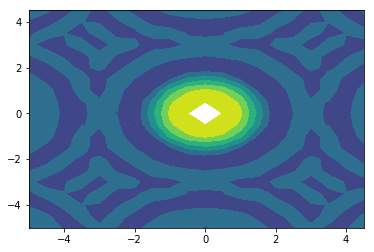

In [107]:
x = np.arange(-5, 5, 0.5)
y = np.arange(-5, 5, 0.5)
xx, yy = np.meshgrid(x, y, sparse = True)
print (xx)
print (yy)

z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
plt.contourf(x,y,z)
plt.show()

`numpy.mgrid\[start:stop:step\]` returns a dense multi-dimensional “meshgrid”.

> Having meshed arrays like this is sometimes very useful. However, it is not always needed just to evaluate some N-dimensional function over a grid due to the array-broadcasting rules of NumPy and SciPy. If this is the only purpose for generating a meshgrid, you should instead use the function ogrid which generates an “open” grid using newaxis judiciously to create N, N-d arrays where only one dimension in each array has length greater than 1. This will save memory and create the same result if the only purpose for the meshgrid is to generate sample points for evaluation of an N-d function.

`numpy.ogrid\[start:stop:setp\]` returns an open multi-dimensional “meshgrid”.
 - If the step length is not a complex number, then the stop is not inclusive.
 - If the step length is a complex number (e.g. 5j), then the integer part of its magnitude is interpreted as specifying the number of points to create between the start and stop values, where the stop value is inclusive.

In [109]:
np.ogrid[0:5,0:5]

[array([[0],
        [1],
        [2],
        [3],
        [4]]), array([[0, 1, 2, 3, 4]])]

In [110]:
np.ogrid[-1:1:5j]

array([-1. , -0.5,  0. ,  0.5,  1. ])

In [111]:
np.mgrid[0:5,0:5]

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [112]:
np.mgrid[-1:1:5j]

array([-1. , -0.5,  0. ,  0.5,  1. ])

### 6. Array Iterators

In [171]:
# Default Iteration
a = np.arange(12).reshape(3,2,2)+10
for val in a:
    print ('item:', val)

item: [[10 11]
 [12 13]]
item: [[14 15]
 [16 17]]
item: [[18 19]
 [20 21]]


In [173]:
# Flat iteration
for i, val in enumerate(a.flat):
    print (i, val)

0 10
1 11
2 12
3 13
4 14
5 15
6 16
7 17
8 18
9 19
10 20
11 21


In [175]:
# N-dimensional enumeration
for i, val in np.ndenumerate(a):
    print (i, val)

(0, 0, 0) 10
(0, 0, 1) 11
(0, 1, 0) 12
(0, 1, 1) 13
(1, 0, 0) 14
(1, 0, 1) 15
(1, 1, 0) 16
(1, 1, 1) 17
(2, 0, 0) 18
(2, 0, 1) 19
(2, 1, 0) 20
(2, 1, 1) 21


In [176]:
# Iterator for broadcasting
for val in np.broadcast([[1,0],[2,3]],[0,1]):
    print (val)

(1, 0)
(0, 1)
(2, 0)
(3, 1)


5 IO
https://docs.scipy.org/doc/numpy/reference/routines.io.html
6 random sampling
https://docs.scipy.org/doc/numpy/reference/routines.random.html
7 stat
https://docs.scipy.org/doc/numpy/reference/routines.statistics.html